In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = 'D:/Master Project/ML/copy.csv'
data = pd.read_csv(data_path)
data.head(), data.columns, data.describe(), data.dtypes

(       date                   province   region            variable  value
 0  1/1/2019                    Bangkok  central  ratio_tourist_stay  93.37
 1  1/1/2019                   Lopburi   central  ratio_tourist_stay  61.32
 2  1/1/2019  Phra Nakhon Si Ayutthaya   central  ratio_tourist_stay  73.37
 3  1/1/2019                  Saraburi   central  ratio_tourist_stay  67.33
 4  1/1/2019                   Chainat   central  ratio_tourist_stay  79.31,
 Index(['date', 'province', 'region', 'variable', 'value'], dtype='object'),
               value
 count  3.080000e+04
 mean   3.360089e+08
 std    2.993817e+09
 min   -4.250000e+03
 25%    1.740250e+03
 50%    9.335250e+04
 75%    1.817250e+07
 max    1.100000e+11,
 date         object
 province     object
 region       object
 variable     object
 value       float64
 dtype: object)

In [2]:
# Pivot the table to make each unique variable a separate column
data = data.pivot_table(index=['date', 'province', 'region'], 
                                columns='variable', 
                                values='value', 
                                aggfunc='first').reset_index()

data.head()

variable,date,province,region,no_tourist_all,no_tourist_foreign,no_tourist_stay,no_tourist_thai,ratio_tourist_stay,revenue_all,revenue_foreign,revenue_thai
0,1/1/2019,Amnat Charoen,east_northeast,21790.0,818.0,8551.0,20972.0,65.15,3.451000e+07,1.870000e+06,3.264000e+07
1,1/1/2019,Ang Thong,central,104097.0,5281.0,19140.0,98816.0,71.21,1.320700e+08,5.750000e+06,1.263200e+08
2,1/1/2019,Bangkok,central,5959075.0,2425014.0,3334971.0,3534061.0,93.37,8.192649e+10,5.218391e+10,2.974258e+10
3,1/1/2019,Bueng Kan,east_northeast,65978.0,278.0,37974.0,65700.0,72.95,1.378100e+08,6.700000e+05,1.371400e+08
4,1/1/2019,Buriram,east_northeast,185563.0,5487.0,113655.0,180076.0,71.26,3.641600e+08,8.250000e+06,3.559100e+08


In [3]:
data.rename(columns={
    'date': 'Date',
    'province': 'Province',
    'region': 'Region',
    'no_tourist_all': 'Total Tourists',
    'no_tourist_foreign': 'Foreign Tourists',
    'no_tourist_thai': 'Thai Tourists',
    'no_tourist_stay': 'Tourists Stay',
    'revenue_all': 'Total Revenue',
    'revenue_foreign': 'Revenue from Foreign Tourists',
    'revenue_thai': 'Revenue from Thai Tourists',
    'ratio_tourist_stay': 'Stay Ratio (%)'
}, inplace=True)

pd.options.display.float_format = '{:,.2f}'.format

columns_to_display = ['Date', 'Province', 'Region', 'Total Tourists', 'Thai Tourists', 'Foreign Tourists', 'Total Revenue']
formatted_data = data[columns_to_display]

print(formatted_data.head())

variable      Date        Province          Region  Total Tourists  \
0         1/1/2019  Amnat Charoen   east_northeast       21,790.00   
1         1/1/2019      Ang Thong          central      104,097.00   
2         1/1/2019         Bangkok         central    5,959,075.00   
3         1/1/2019      Bueng Kan   east_northeast       65,978.00   
4         1/1/2019        Buriram   east_northeast      185,563.00   

variable  Thai Tourists  Foreign Tourists     Total Revenue  
0             20,972.00            818.00     34,510,000.00  
1             98,816.00          5,281.00    132,070,000.00  
2          3,534,061.00      2,425,014.00 81,926,490,000.00  
3             65,700.00            278.00    137,810,000.00  
4            180,076.00          5,487.00    364,160,000.00  


In [4]:
data['Region'] = data['Region'].replace('east_northeast', 'northeast')

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
print(data.head()) 

variable       Date        Province     Region  Total Tourists  \
0        2019-01-01  Amnat Charoen   northeast       21,790.00   
1        2019-01-01      Ang Thong     central      104,097.00   
2        2019-01-01         Bangkok    central    5,959,075.00   
3        2019-01-01      Bueng Kan   northeast       65,978.00   
4        2019-01-01        Buriram   northeast      185,563.00   

variable  Foreign Tourists  Tourists Stay  Thai Tourists  Stay Ratio (%)  \
0                   818.00       8,551.00      20,972.00           65.15   
1                 5,281.00      19,140.00      98,816.00           71.21   
2             2,425,014.00   3,334,971.00   3,534,061.00           93.37   
3                   278.00      37,974.00      65,700.00           72.95   
4                 5,487.00     113,655.00     180,076.00           71.26   

variable     Total Revenue  Revenue from Foreign Tourists  \
0            34,510,000.00                   1,870,000.00   
1           132,070,000.

In [1]:
# Group data by region and date to see the trend of tourists and revenue over time
region_time_data = data.groupby(['Region', pd.Grouper(key='Date')]).agg({
    'Total Tourists': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Plotting Tourist Numbers Over Time by Region
sns.lineplot(x='Date', y='Total Tourists', hue='Region', data=region_time_data, ax=axes[0], palette='viridis')
axes[0].set_title('Tourist Numbers Over Time by Region')
axes[0].set_ylabel('Number of Tourists')
axes[0].set_xlabel('Date')

# Plotting Revenue Over Time by Region
sns.lineplot(x='Date', y='Total Revenue', hue='Region', data=region_time_data, ax=axes[1], palette='viridis')
axes[1].set_title('Tourism Revenue Over Time by Region')
axes[1].set_ylabel('Revenue (in Trillions)')
axes[1].set_xlabel('Date')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

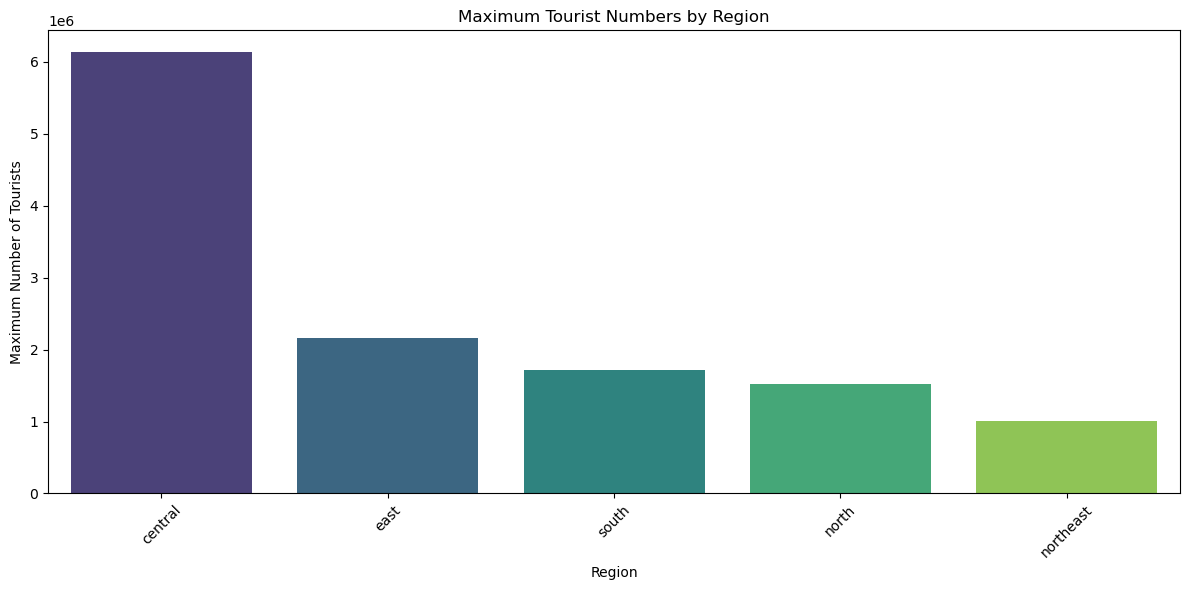

In [9]:
# Group data by region and aggregate the maximum number of tourists
max_tourists_by_region = data.groupby('Region')['Total Tourists'].max().reset_index()

# Sort the data by maximum tourists in descending order 
max_tourists_by_region = max_tourists_by_region.sort_values(by='Total Tourists', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Tourists', data=max_tourists_by_region, palette='viridis')
plt.title('Maximum Tourist Numbers by Region')
plt.xlabel('Region')
plt.ylabel('Maximum Number of Tourists')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10224\1733393726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p_2022['month'] = data_p_2022['Date'].dt.month


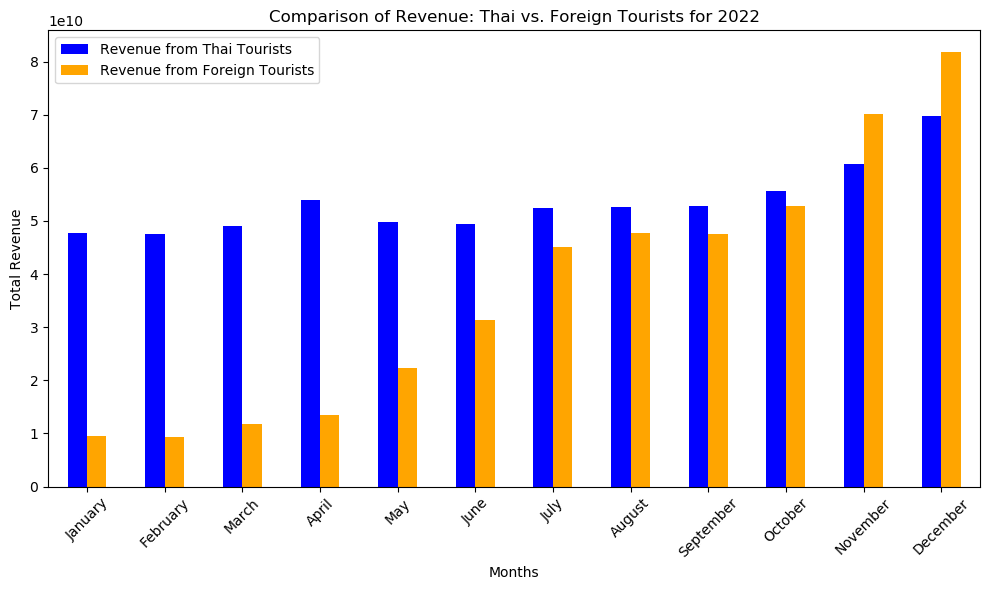

In [10]:
data_p = data.copy()

data_p['year'] = data_p['Date'].dt.year
data_p_2022 = data_p[data_p['year'] == 2022]
data_p_2022['month'] = data_p_2022['Date'].dt.month

# Aggregate data by month for 2022
annual_revenue_2022 = data_p_2022.groupby('month').agg({'Revenue from Thai Tourists':'sum', 'Revenue from Foreign Tourists':'sum'})

# Month names for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Apply style for better aesthetics
plt.style.use('_classic_test_patch')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
annual_revenue_2022.plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_title('Comparison of Revenue: Thai vs. Foreign Tourists for 2022')
ax.set_xlabel('Months')
ax.set_ylabel('Total Revenue')
plt.xticks(ticks=range(len(annual_revenue_2022)), labels=month_names[:len(annual_revenue_2022)], rotation=45)
plt.legend(['Revenue from Thai Tourists', 'Revenue from Foreign Tourists'])
plt.tight_layout()
plt.show()

In [11]:
# Filtering the dataset for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
mask = (data['Date'] >= start_date) & (data['Date'] <= end_date)
df_2022 = data.loc[mask]

df_2022.head()

variable,Date,Province,Region,Total Tourists,Foreign Tourists,Tourists Stay,Thai Tourists,Stay Ratio (%),Total Revenue,Revenue from Foreign Tourists,Revenue from Thai Tourists
231,2022-01-01,Amnat Charoen,northeast,"22,648.00",80.00,"6,918.00","22,568.00",37.36,"24,930,000.00","240,000.00","24,690,000.00"
232,2022-01-01,Ang Thong,central,"47,610.00",14.00,"5,603.00","47,596.00",22.74,"46,700,000.00","10,000.00","46,690,000.00"
233,2022-01-01,Bangkok,central,"2,437,497.00","137,591.00","1,009,583.00","2,299,906.00",26.34,"11,823,610,000.00","2,181,010,000.00","9,642,600,000.00"
234,2022-01-01,Bueng Kan,northeast,"81,273.00",466.00,"36,733.00","80,807.00",64.89,"105,270,000.00","1,010,000.00","104,260,000.00"
235,2022-01-01,Buriram,northeast,"196,609.00","1,143.00","113,745.00","195,466.00",61.59,"367,720,000.00","2,100,000.00","365,620,000.00"


In [12]:
# For a DataFrame
num_rows, num_columns = df_2022.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 924
Number of columns: 11


In [13]:
nan_counts = df_2022.isnull().sum()
print(nan_counts)

variable
Date                             0
Province                         0
Region                           0
Total Tourists                   0
Foreign Tourists                 0
Tourists Stay                    0
Thai Tourists                    0
Stay Ratio (%)                   0
Total Revenue                    0
Revenue from Foreign Tourists    0
Revenue from Thai Tourists       0
dtype: int64


In [14]:
from sklearn.preprocessing import MinMaxScaler
# Selecting the features for the model
features = df_2022[['Total Tourists']]

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test 
for i in range(scaled_features.shape[1]):
    column_to_test = scaled_features[:, i]
    adf_result = adfuller(column_to_test)
    
    # Print p-value and ADF statistic 
    p_value = adf_result[1]
    adf_statistic = adf_result[0]
    print(f"Results for column {i+1}:")
    print(f"P-value: {p_value}")
    print(f"ADF Statistic: {adf_statistic}")
    print()

Results for column 1:
P-value: 1.543440148914507e-13
ADF Statistic: -8.46362092787497



In [16]:
significance_level = 0.05

# Check if the p-value is greater than or equal to the significance level
if p_value >= significance_level:
    # Apply differencing to the dataset
    finnal_data = np.diff(scaled_features)
    print("Differencing applied to make the data stationary.")
else:
    finnal_data = scaled_features
    print("No differencing needed, the data is already stationary.")


No differencing needed, the data is already stationary.


In [17]:
train_size = int(len(finnal_data) * 0.8)
train_data, test_data = finnal_data[:train_size], finnal_data[train_size:]

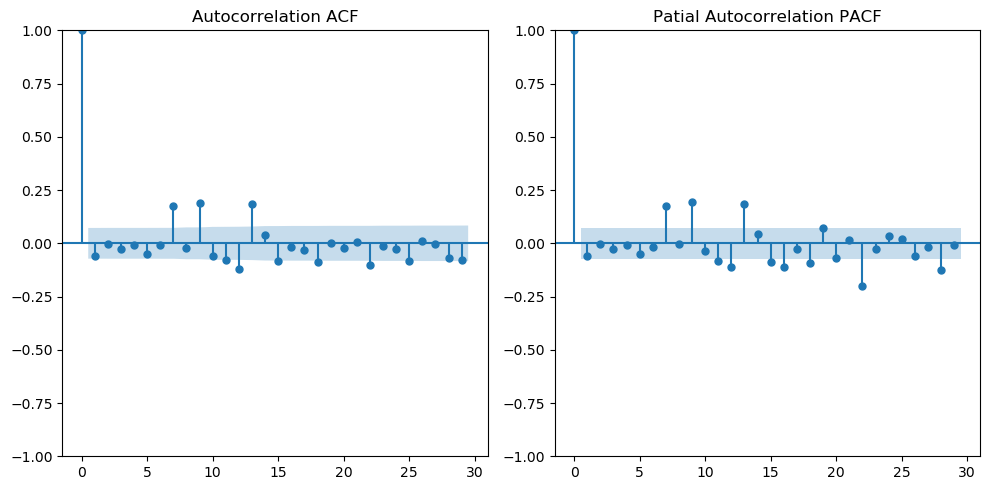

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(nrows=train_data.shape[1], ncols=2, figsize=(10, 5 * train_data.shape[1]))

if train_data.shape[1] == 1:
    axes = axes.reshape(1, -1)  
    
for i in range(train_data.shape[1]):
    column_to_test = train_data[:, i] 

    # Plot ACF
    plot_acf(column_to_test, ax=axes[i, 0], title=f"Autocorrelation ACF")

    # Plot PACF
    plot_pacf(column_to_test, ax=axes[i, 1], title=f"Patial Autocorrelation PACF")

plt.tight_layout()
plt.show()


In [19]:
from pmdarima import auto_arima
import numpy as np
train_scaled_features_g_1d = np.ravel(train_data)
model = auto_arima(train_scaled_features_g_1d, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1224.784, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1248.062, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1240.969, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1276.465, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1291.116, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-1304.584, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-1308.663, Time=0.34 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1396.662, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.94 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1408.023, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1408.371, Time=0.82 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-

In [20]:
print("Shape of train_data:", np.array(train_data).shape)
print("Shape of test_data:", np.array(test_data).shape)


Shape of train_data: (739, 1)
Shape of test_data: (185, 1)


In [25]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

history = np.array(train_data) 
predictions = []

for t in range(len(test_data)):
    
    column_to_forecast = history[:, 0]
    model = ARIMA(column_to_forecast, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=30)
    forecast = output[0]
    predictions.append(forecast)
    
    act_data = test_data[t, 0]  # Use index 0 here as well
    print(f'predicted={forecast}, expected={act_data}')
    
    history = np.vstack((history, test_data[t, :]))

# Optionally, you can convert predictions to a numpy array if needed elsewhere
predictions = np.array(predictions)


predicted=0.04494476701250025, expected=0.020124789146881608
predicted=0.050079506978696994, expected=0.11612911981710668
predicted=0.04667037980685809, expected=0.015875548831021116
predicted=0.05248312722142247, expected=0.1623567917141127
predicted=0.04389433391018879, expected=0.006697610032164814
predicted=0.0533144466883375, expected=0.025797082795392466
predicted=0.052069771650443374, expected=0.04177748357939613
predicted=0.05107744532121649, expected=0.007241789479168172
predicted=0.05310917633117739, expected=0.018895460195002746
predicted=0.05234007742717004, expected=0.024903542770184223
predicted=0.05192974137173986, expected=0.03416816502077557
predicted=0.051346110752797165, expected=0.005203633875367583
predicted=0.05302243316157528, expected=0.07635017137493526
predicted=0.048756530098878766, expected=0.07428618585369848
predicted=0.048967782831119765, expected=0.027556581747529632
predicted=0.051746219418977266, expected=0.008624784550031893
predicted=0.05280920142712

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.05260000096384118, expected=0.007591587852583846
predicted=0.05208473900714878, expected=0.766434284968783
predicted=0.009345261047070105, expected=0.009683811164916142
predicted=0.048954958647759506, expected=0.04405161080180879
predicted=0.05081418407360242, expected=0.08382005215892141
predicted=0.048591197314718004, expected=0.011132694415002716
predicted=0.05099883327886107, expected=0.013906127075313473
predicted=0.0528824531586659, expected=0.0215395243705271
predicted=0.05329310315453424, expected=0.13500444143241339
predicted=0.04551965645521611, expected=0.07893557099221468
predicted=0.048296787206377326, expected=0.2567607619913203
predicted=0.03808040805417063, expected=0.01693348095787841
predicted=0.05218433411303154, expected=0.008920953010126641
predicted=0.05147349692658447, expected=0.010033609538331817
predicted=0.053454429607393106, expected=0.19401201222499348
predicted=0.042238718756514096, expected=0.061881039658554765
predicted=0.04931432039406041, e

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.055113321067599974, expected=0.04010817044068028
predicted=0.05153249749043304, expected=0.0503823484473374
predicted=0.05064925982902434, expected=0.027199559753136038
predicted=0.052389430334488736, expected=0.0016892328208064798
predicted=0.05413153533491776, expected=0.01972508211943666
predicted=0.05381624945597151, expected=0.010213324472358266
predicted=0.054171352021485326, expected=0.012969245324237702
predicted=0.0541201808149126, expected=0.03602704348576049
predicted=0.05137994210184263, expected=0.15396250634255812
predicted=0.04422772250484616, expected=0.010258855174279706
predicted=0.050541616947249506, expected=0.04279688972770451
predicted=0.05101503518005224, expected=0.15808653722813465
predicted=0.04394226714096583, expected=0.018902902713586058
predicted=0.05166644257352865, expected=0.12093654902671558
predicted=0.046294868834475755, expected=0.014605942719750213
predicted=0.050685688325421585, expected=0.16958763631301133
predicted=0.0433016045026733

In [26]:
# Inverse transforming the predicted values
predicted_values = scaler.inverse_transform(np.hstack((np.zeros((len(predictions), 0)), np.array(predictions).reshape(-1, 1))))
predicted_values

array([[220006.24660249],
       [243463.5153881 ],
       [227889.44290914],
       [254444.08430948],
       [215207.50474128],
       [258241.83927088],
       [252555.73304022],
       [248022.4430234 ],
       [257304.09325583],
       [253790.5833541 ],
       [251916.02627662],
       [249249.7996731 ],
       [256907.82044395],
       [237419.69925109],
       [238384.77482541],
       [251077.63449781],
       [255933.70410282],
       [254086.92427989],
       [244292.11090888],
       [253983.92679063],
       [241070.63634265],
       [239410.52571048],
       [254987.54018876],
       [250590.82329816],
       [253313.82829639],
       [251350.96901454],
       [247082.22284209],
       [240067.8170899 ],
       [252645.09823846],
       [252460.9512447 ],
       [251370.71200487],
       [254270.06563735],
       [254978.00400316],
       [252624.10910435],
       [ 57375.38592334],
       [238326.18951866],
       [246819.77455591],
       [236664.4018879 ],
       [2476

In [23]:
import numpy as np

actual_values = np.array([x[0] for x in test_data]) 
predictions = np.array(predictions) 

def calculate_mape(actual, predicted, epsilon=0.1):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

mape = calculate_mape(actual_values, predictions)
print("MAPE:", mape)


MAPE: 26.497029622759438


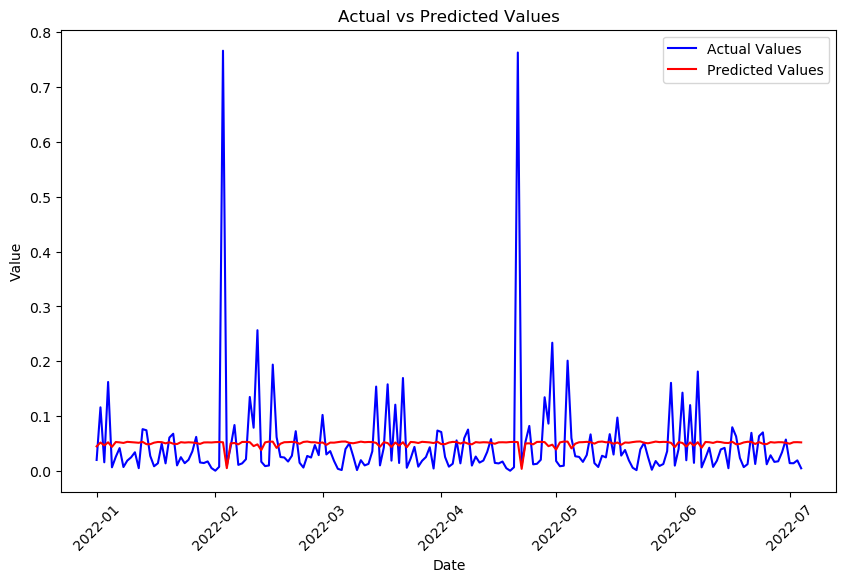

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.date_range(start='2022-01-01', periods=len(predicted_values))  

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', color='blue')
plt.plot(dates, predictions, label='Predicted Values', color='red', linestyle='-')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()
